In [1]:
%load_ext autoreload
%autoreload 2
import uproot as ur
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import analysisTools as tools
from helpers import getMatches, getRegMatches, mergeTrees

# Load Ntuples

In [2]:
t1 = tools.loadNano("regIDNoCut_Mchi-48p0_dMchi-16p0_ctau-1.root")
t2 = tools.loadNano("IDNoCut_Mchi-48p0_dMchi-16p0_ctau-1.root")

# Compare with/without regression

In [3]:
e1 = t1.Electron
le1 = t1.LptElectron
n1 = t1.eventNum

e2 = t2.Electron
le2 = t2.LptElectron
n2 = t2.eventNum

e1 = e1[ak.argsort(n1)]
le1 = le1[ak.argsort(n1)]

e2 = e2[ak.argsort(n2)]
le2 = le2[ak.argsort(n2)]

le1 = le1[ak.argsort(le1.eta,axis=1)]
le2 = le2[ak.argsort(le2.eta,axis=1)]

ID1 = (le1.pt>1) & (le1.ID > -0.25)
ID2 = (le2.pt>1) & (le2.ID > -0.25)

le1_passID = le1[ID1]
le2_passID = le2[ID1]

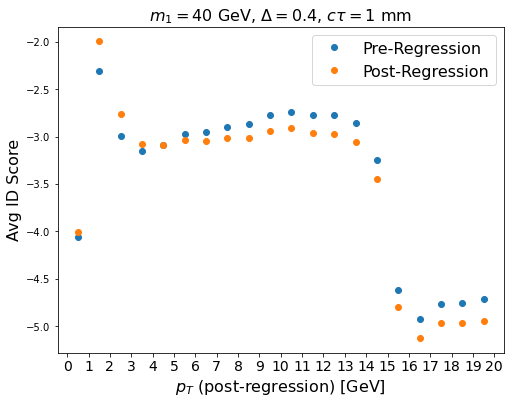

In [11]:
pt_bins = np.arange(0,21,step=1)
IDs_pre = []
IDs_post = []
for i in range(len(pt_bins)-1):
    inBin = (le1.pt>pt_bins[i]) & (le1.pt<pt_bins[i+1])
    IDs_pre.append(ak.flatten(le2.ID[inBin]))
    IDs_post.append(ak.flatten(le1.ID[inBin]))
avgs_pre = [np.average(ids) for ids in IDs_pre]
avgs_post = [np.average(ids) for ids in IDs_post]
ptvals = (pt_bins[1:]+pt_bins[:-1])/2

plt.figure(figsize=(8,6))
plt.plot(ptvals,avgs_pre,marker='o',linewidth=0,label="Pre-Regression")
plt.plot(ptvals,avgs_post,marker='o',linewidth=0,label="Post-Regression")
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
plt.xticks(pt_bins,fontsize=14)
plt.legend(loc='upper right',fontsize=16)
plt.xlabel(r"$p_T$ (post-regression) [GeV]",fontsize=16)
plt.ylabel("Avg ID Score",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/AvgID_by_corrPt.pdf")

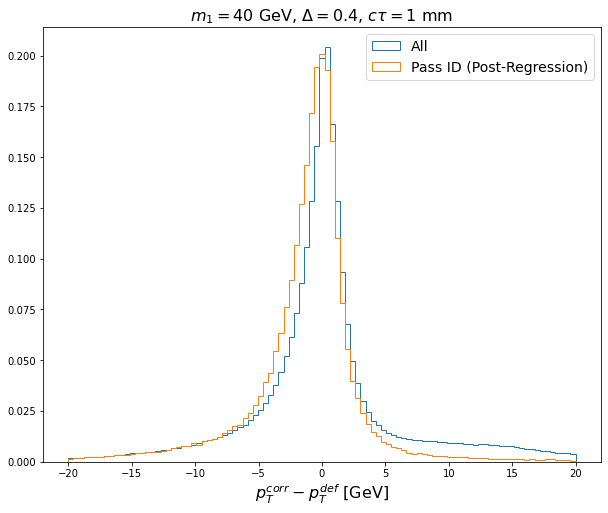

In [4]:
plt.figure(figsize=(10,8))
h = plt.hist(ak.flatten(le1.pt - le2.pt),bins=np.linspace(-20,20,num=100),label="All",density=True,histtype='step')
h2 = plt.hist(ak.flatten(le1_passID.pt-le2_passID.pt),bins=np.linspace(-20,20,num=100),label="Pass ID (Post-Regression)",density=True,histtype='step')
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
plt.xlabel(r"$p_T^{corr} - p_T^{def}$ [GeV]",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.savefig("plots/Regression_vs_noRegression/ptDiff_PrePostRegression.pdf")

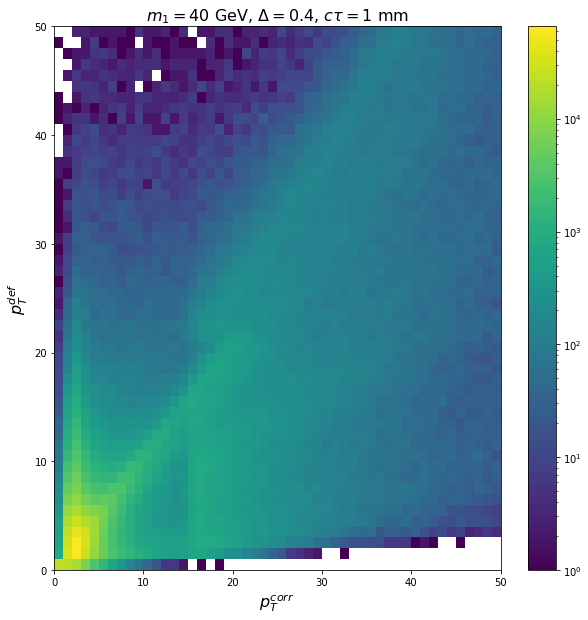

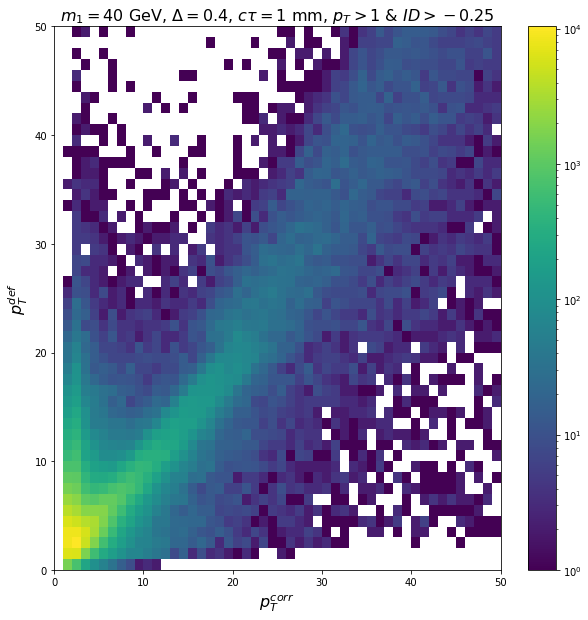

In [5]:
plt.figure(figsize=(10,10))
h2 = plt.hist2d(ak.flatten(le1.pt),ak.flatten(le2.pt),bins=np.arange(0,51,step=1),norm=mpl.colors.LogNorm())
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
plt.xlabel(r"$p_T^{corr}$",fontsize=16)
plt.ylabel("$p_T^{def}$",fontsize=16)
plt.colorbar()
plt.savefig("plots/Regression_vs_noRegression/ptCorr_vs_ptDef_all.pdf")

plt.figure(figsize=(10,10))
h2 = plt.hist2d(ak.flatten(le1_passID.pt),ak.flatten(le2_passID.pt),bins=np.arange(0,51,step=1),norm=mpl.colors.LogNorm())
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.xlabel(r"$p_T^{corr}$",fontsize=16)
plt.ylabel("$p_T^{def}$",fontsize=16)
plt.colorbar()
plt.savefig("plots/Regression_vs_noRegression/ptCorr_vs_ptDef_passID.pdf")

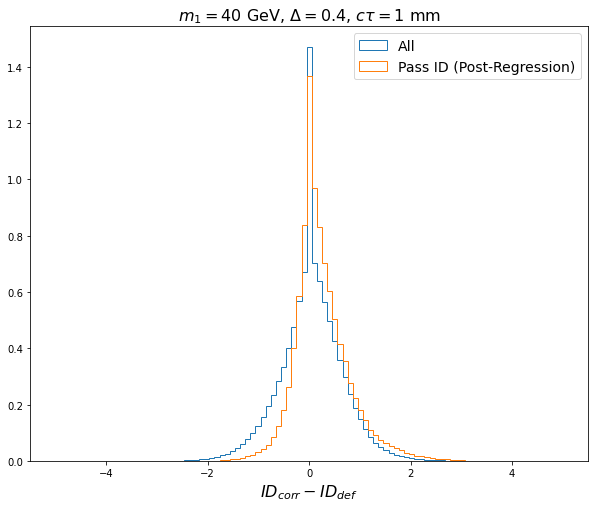

In [6]:
plt.figure(figsize=(10,8))
h = plt.hist(ak.flatten(le1.ID-le2.ID),bins=np.linspace(-5,5,num=100),density=True,histtype='step',label="All")
h2 = plt.hist(ak.flatten(le1_passID.ID-le2_passID.ID),bins=np.linspace(-5,5,num=100),density=True,histtype='step',label="Pass ID (Post-Regression)")
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
plt.xlabel(r"$ID_{corr} - ID_{def}$",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.savefig("plots/Regression_vs_noRegression/IDdiff_PrePostReg.pdf")

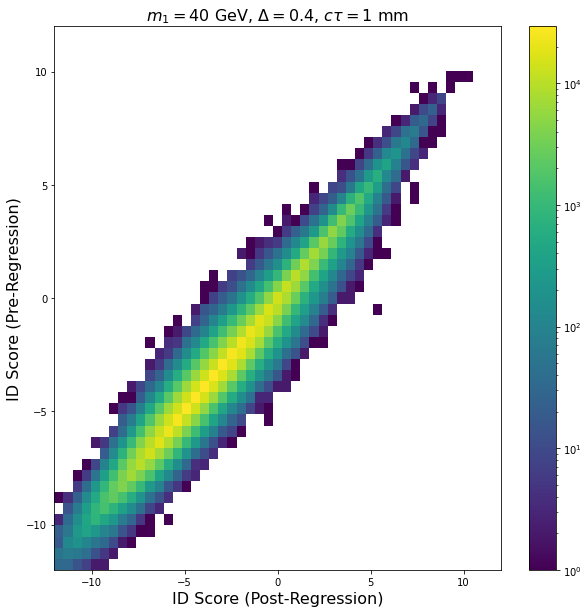

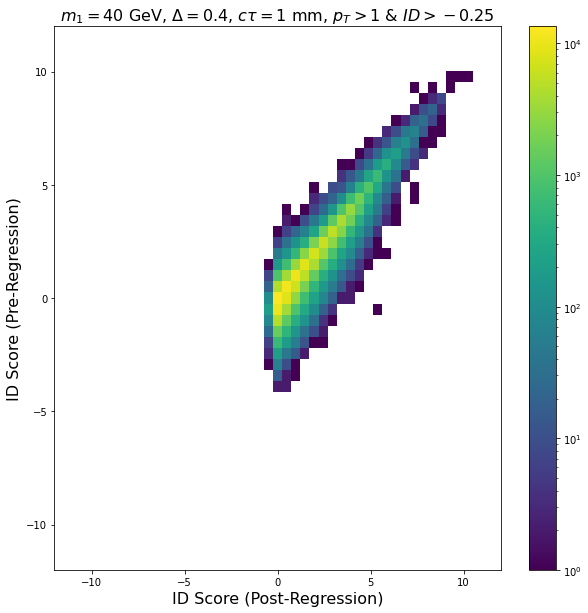

In [7]:
plt.figure(figsize=(10,10))
h2 = plt.hist2d(ak.flatten(le1.ID),ak.flatten(le2.ID),bins=np.linspace(-12,12,num=50),norm=mpl.colors.LogNorm())
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
plt.xlabel("ID Score (Post-Regression)",fontsize=16)
plt.ylabel("ID Score (Pre-Regression)",fontsize=16)
plt.colorbar()
plt.savefig('plots/Regression_vs_noRegression/IDcorr_vs_IDdef_all.pdf')

plt.figure(figsize=(10,10))
h2 = plt.hist2d(ak.flatten(le1_passID.ID),ak.flatten(le2_passID.ID),bins=np.linspace(-12,12,num=50),norm=mpl.colors.LogNorm())
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.xlabel("ID Score (Post-Regression)",fontsize=16)
plt.ylabel("ID Score (Pre-Regression)",fontsize=16)
plt.colorbar()
plt.savefig('plots/Regression_vs_noRegression/IDcorr_vs_IDdef_passID.pdf')

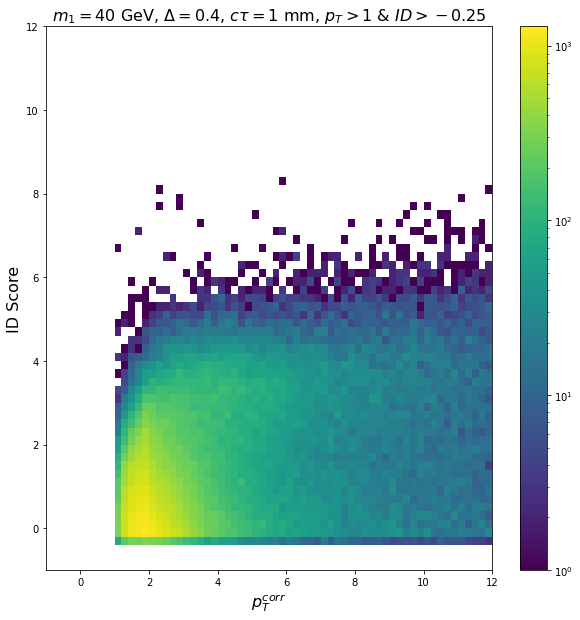

In [8]:
plt.figure(figsize=(10,10))
h2 = plt.hist2d(ak.flatten(le1_passID.pt),ak.flatten(le1_passID.ID),bins=np.arange(-1,12.2,step=0.2),norm=mpl.colors.LogNorm())
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.xlabel(r"$p_T^{corr}$",fontsize=16)
plt.ylabel("ID Score",fontsize=16)
plt.colorbar()
plt.savefig('plots/Regression_vs_noRegression/pTcorr_vs_IDcorr_passID.pdf')

In [9]:
ID1 = (le1.pt>1) & (le1.ID > -0.25)
ID2 = (le2.pt>1) & (le2.ID > -0.25)

In [10]:
n1 = ak.count(le1.pt)
sn1 = ak.count(le1.pt[ID1])
print("ID efficiency (post-reg) : {0:.2f} %".format(100*sn1/n1))

n2 = ak.count(le2.pt)
sn2 = ak.count(le2.pt[ID2])
print("ID efficiency (pre-reg) : {0:.2f} %".format(100*sn2/n2))

ID efficiency (post-reg) : 15.79 %
ID efficiency (pre-reg) : 14.26 %


In [11]:
print("both pass: {0:.2f} %".format(100*ak.count_nonzero(ID1&ID2)/n1))
print("post-reg pass, pre-reg fail: {0:.2f} %".format(100*ak.count_nonzero(ID1&(~ID2))/n1))
print("post-reg fail, pre-reg pass: {0:.2f} %".format(100*ak.count_nonzero((~ID1)&(ID2))/n1))
print("both fail: {0:.2f} %".format(100*ak.count_nonzero((~ID1)&(~ID2))/n1))

both pass: 13.35 %
post-reg pass, pre-reg fail: 2.44 %
post-reg fail, pre-reg pass: 0.91 %
both fail: 83.30 %


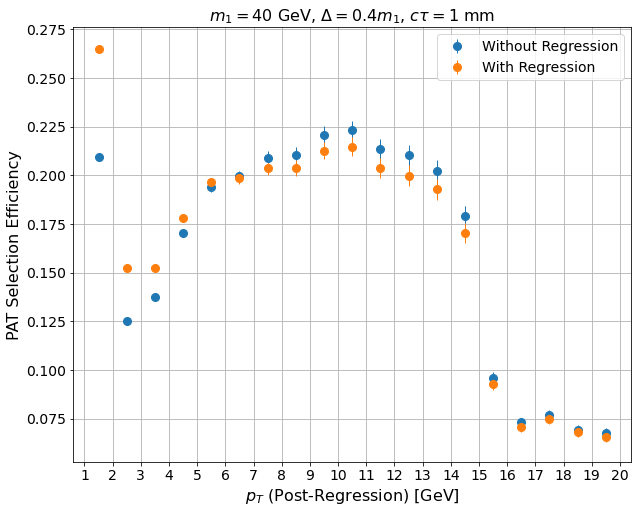

In [15]:
# binned efficiency
pt_bins = np.arange(1,21,step=1)
pts = []
effs_preReg = []
errs_preReg = []
effs_postReg = []
errs_postReg = []
for i in range(len(pt_bins)-1):
    ptcut_pre = (le1.pt > pt_bins[i]) & (le1.pt < pt_bins[i+1])
    cut_pre = ID2 & (le1.pt > pt_bins[i]) & (le1.pt < pt_bins[i+1])
    ptcut_post = (le1.pt > pt_bins[i]) & (le1.pt < pt_bins[i+1])
    cut_post = ID1 & (le1.pt > pt_bins[i]) & (le1.pt < pt_bins[i+1])
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    
    n_pre = ak.count_nonzero(ptcut_pre)
    k_pre = ak.count_nonzero(cut_pre)
    eff_pre = k_pre/n_pre
    err_pre = eff_pre*np.sqrt(1/k_pre + 1/n_pre)
    
    n_post = ak.count_nonzero(ptcut_post)
    k_post = ak.count_nonzero(cut_post)
    eff_post = k_post/n_post
    err_post = eff_post*np.sqrt(1/k_post + 1/n_post)
    
    effs_preReg.append(eff_pre)
    errs_preReg.append(err_pre)
    effs_postReg.append(eff_post)
    errs_postReg.append(err_post)
plt.figure(figsize=(10,8))
plt.errorbar(pts,effs_preReg,errs_preReg,label="Without Regression",marker="o",markersize=8,linewidth=0,elinewidth=1)
plt.errorbar(pts,effs_postReg,errs_postReg,label="With Regression",marker="o",markersize=8,linewidth=0,elinewidth=1)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm",fontsize=16)
plt.ylabel("PAT Selection Efficiency",fontsize=16)
plt.xlabel(r"$p_T$ (Post-Regression) [GeV]",fontsize=16)
plt.xticks(ticks=np.arange(1,21,step=1),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
plt.grid()
plt.savefig("plots/Regression_vs_noRegression/PATeff_vs_pt.pdf")

In [13]:
from helpers import getMatches

gen1, pt1, id1, prob1, nh1 = getMatches(t1)
gen2, pt2, id2, prob2, nh2 = getMatches(t2)

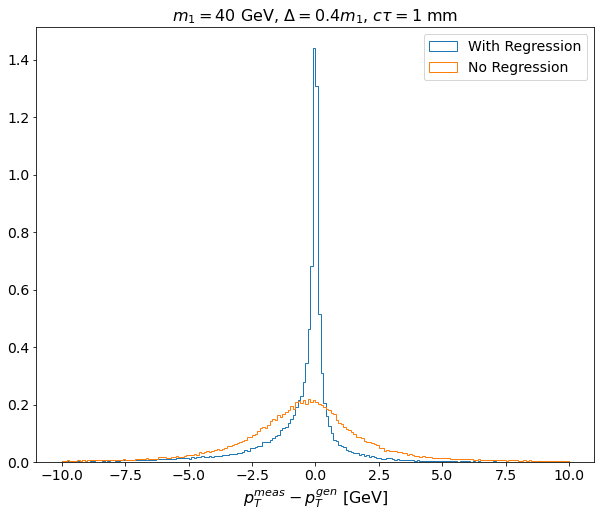

In [16]:
plt.figure(figsize=(10,8))
h = plt.hist(pt1-gen1.pt,bins=np.arange(-10,10.1,step=0.1),histtype='step',label="With Regression",density=True)
h2 = plt.hist(pt2-gen2.pt,bins=np.arange(-10,10.1,step=0.1),histtype='step',label="No Regression",density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas} - p_T^{gen}$ [GeV]",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/ptDiff_MeasVsGen.pdf")

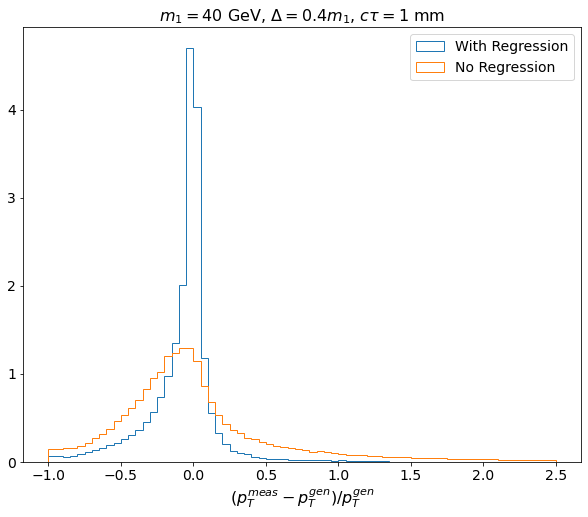

In [17]:
plt.figure(figsize=(10,8))
h = plt.hist((pt1-gen1.pt)/gen1.pt,bins=np.arange(-1,2.55,step=0.05),histtype='step',label="With Regression",density=True)
h2 = plt.hist((pt2-gen2.pt)/gen2.pt,bins=np.arange(-1,2.55,step=0.05),histtype='step',label="No Regression",density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"($p_T^{meas} - p_T^{gen}$)/$p_T^{gen}$",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/relPtDiff_MeasVsGen.pdf")

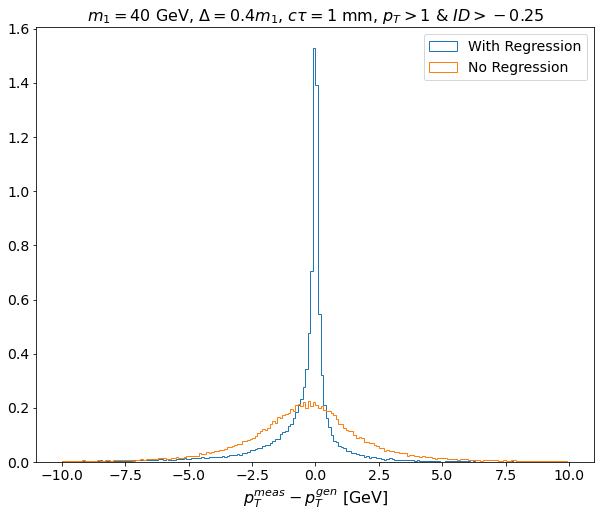

In [19]:
passID = (pt1>1) & (id1>-0.25)
plt.figure(figsize=(10,8))
h = plt.hist(pt1[passID]-gen1.pt[passID],bins=np.arange(-10,10.1,step=0.1),histtype='step',label="With Regression",density=True)
h2 = plt.hist(pt2[passID]-gen2.pt[passID],bins=np.arange(-10,10.1,step=0.1),histtype='step',label="No Regression",density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas} - p_T^{gen}$ [GeV]",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/ptDiff_MeasVsGen_passID.pdf")

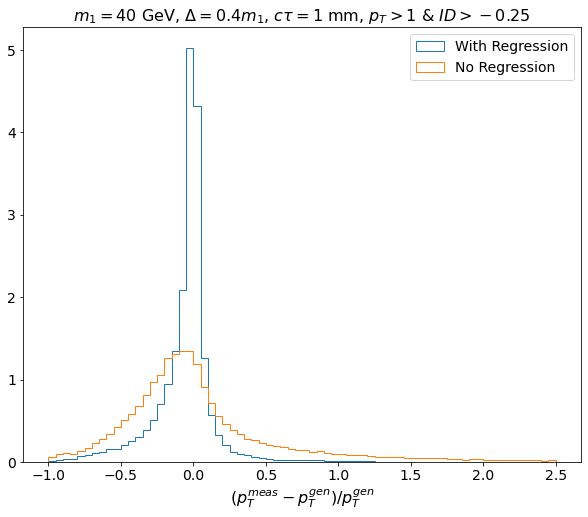

In [20]:
plt.figure(figsize=(10,8))
h = plt.hist((pt1[passID]-gen1.pt[passID])/gen1.pt[passID],bins=np.arange(-1,2.55,step=0.05),histtype='step',label="With Regression",density=True)
h2 = plt.hist((pt2[passID]-gen2.pt[passID])/gen2.pt[passID],bins=np.arange(-1,2.55,step=0.05),histtype='step',label="No Regression",density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"($p_T^{meas} - p_T^{gen}$)/$p_T^{gen}$",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/relPtDiff_MeasVsGen_passID.pdf")

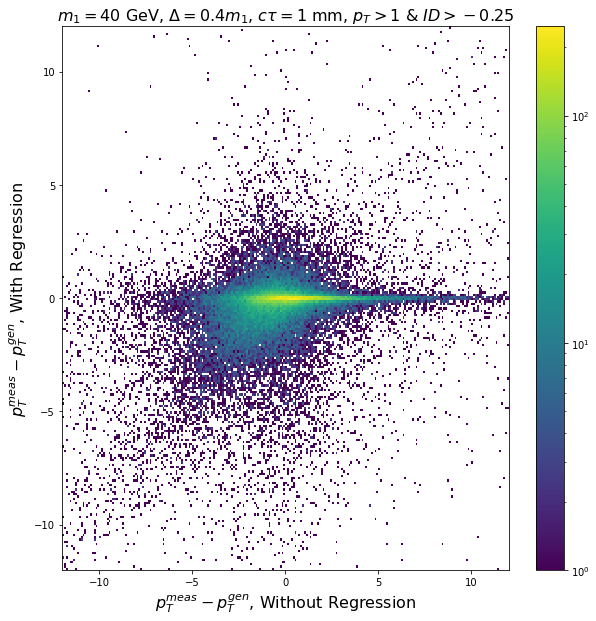

In [21]:
passID = (pt1>1) & (id1>-0.25)
plt.figure(figsize=(10,10))
h = plt.hist2d(pt2[passID]-gen2.pt[passID],pt1[passID]-gen1.pt[passID],bins=np.arange(-12,12.1,step=0.1),norm=mpl.colors.LogNorm())
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.xlabel(r"$p_T^{meas} - p_T^{gen}$, Without Regression",fontsize=16)
plt.ylabel(r"$p_T^{meas} - p_T^{gen}$, With Regression",fontsize=16)
plt.colorbar()
plt.savefig("plots/Regression_vs_noRegression/MeasGenPtDiff_with_vs_without_regression.pdf")

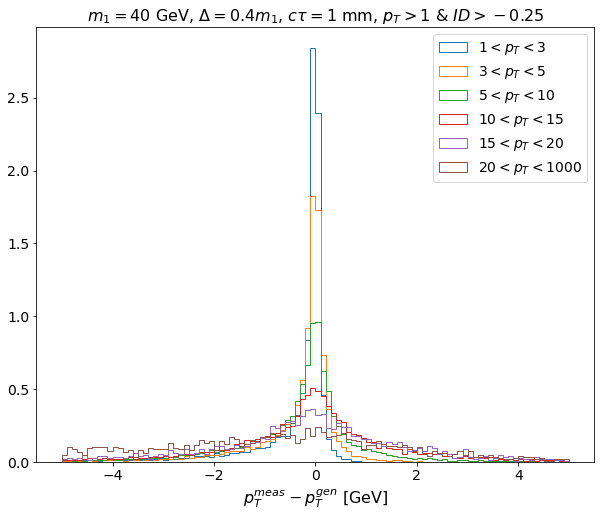

In [22]:
passID = (pt1>1) & (id1>-0.25)
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,1000]
for i in range(len(pt_bins)-1):
    filt = passID & (pt1 > pt_bins[i]) & (pt1 < pt_bins[i+1])
    h = plt.hist(pt1[filt]-gen1.pt[filt],bins=np.arange(-5,5.1,step=0.1),histtype='step',label=r'${0} < p_T < {1}$'.format(pt_bins[i],pt_bins[i+1]),density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas} - p_T^{gen}$ [GeV]",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/binned_ptDiff_measVsGen_withReg.pdf")

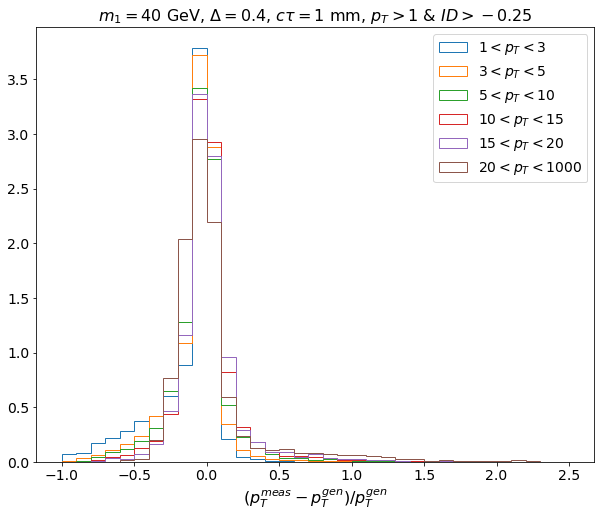

In [23]:
passID = (pt1>1) & (id1>-0.25)
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,1000]
for i in range(len(pt_bins)-1):
    filt = passID & (pt1 > pt_bins[i]) & (pt1 < pt_bins[i+1])
    h = plt.hist((pt1[filt]-gen1.pt[filt])/gen1.pt[filt],bins=np.arange(-1,2.6,step=0.1),histtype='step',label=r'${0} < p_T < {1}$'.format(pt_bins[i],pt_bins[i+1]),density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$(p_T^{meas} - p_T^{gen})/p_T^{gen}$",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.savefig("plots/Regression_vs_noRegression/binned_relPtDiff_measVsGen_withReg.pdf")

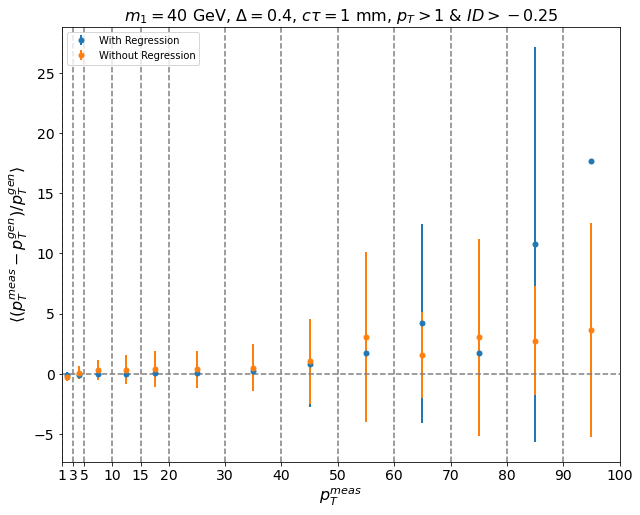

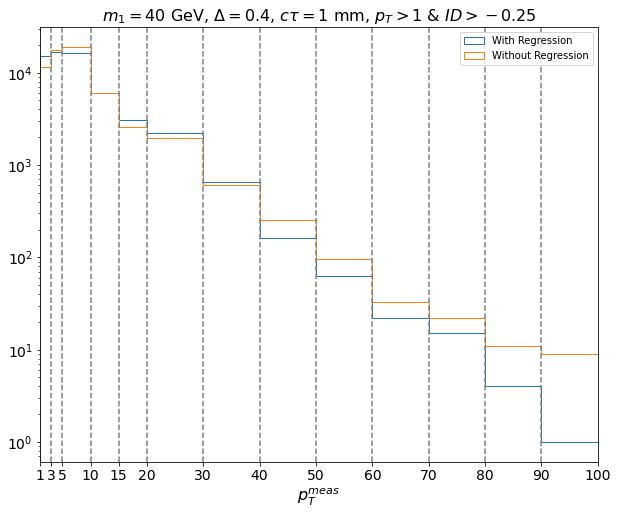

In [28]:
passID = (pt1>1) & (id1>-0.25)
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,30,40,50,60,70,80,90,100]
nevs = []
pts = []
stds = []
means = []

nevs_noReg = []
pts_noReg = []
stds_noReg = []
means_noReg = []
for i in range(len(pt_bins)-1):
    filt = passID & (pt1 > pt_bins[i]) & (pt1 < pt_bins[i+1])
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    diff = (pt1[filt]-gen1.pt[filt])/gen1.pt[filt]
    means.append(ak.mean(diff))
    stds.append(ak.std(diff))
    nevs.append(ak.count_nonzero(filt))
    
    filt_noReg = passID & (pt2 > pt_bins[i]) & (pt2 < pt_bins[i+1])
    pts_noReg.append((pt_bins[i]+pt_bins[i+1])/2)
    diff = (pt2[filt_noReg]-gen2.pt[filt_noReg])/gen2.pt[filt_noReg]
    means_noReg.append(ak.mean(diff))
    stds_noReg.append(ak.std(diff))
    nevs_noReg.append(ak.count_nonzero(filt_noReg))
    
plt.errorbar(pts,means,stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label="With Regression")
plt.errorbar(pts_noReg,means_noReg,stds_noReg,linewidth=0,elinewidth=2,markersize=5,marker='o',label="Without Regression")
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.ylabel(r"$\langle (p_T^{meas} - p_T^{gen})/p_T^{gen} \rangle$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.xlim((pt_bins[0],pt_bins[-1]))
for binedge in pt_bins[:-1]:
    plt.axvline(binedge,linestyle="--",color='gray')
plt.axhline(0,linestyle='--',color='gray')
plt.legend(loc='upper left')
plt.savefig("plots/Regression_vs_noRegression/binned_relPtDiffMeanStd_measVsGen_withReg.pdf")

plt.figure(figsize=(10,8))
h = plt.hist(pt1[passID],bins=pt_bins,label="With Regression",histtype='step')
h2 = plt.hist(pt2[passID],bins=pt_bins,label="Without Regression",histtype='step')
plt.xlim((pt_bins[0],pt_bins[-1]))
for binedge in pt_bins[:-1]:
    plt.axvline(binedge,linestyle="--",color='gray')
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig("plots/Regression_vs_noRegression/binned_pt_dist_withReg.pdf")